<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" dataset.

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load Data

From UCI's Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [122]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

In [124]:
b_cancer = pd.read_csv(breast_cancer_csv, index_col='id')

In [128]:
b_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [130]:
b_cancer.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


### 2. EDA

Explore dataset. Check for nulls. Make the target column binary.

In [132]:
label_list = []
for i in range(len(b_cancer)):
    if b_cancer['diagnosis'].iloc[i] == 'M':
        label_list.append(1)
    else:
        label_list.append(0)
b_cancer['diagnosisnum'] = label_list

In [134]:
b_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosisnum
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [136]:
b_cancer.shape


(569, 33)

In [138]:
b_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [140]:
b_cancer.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
diagnosi

In [144]:
b_cancer.drop(labels='Unnamed: 32', axis=1, inplace = True) 

In [148]:
b_cancer['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

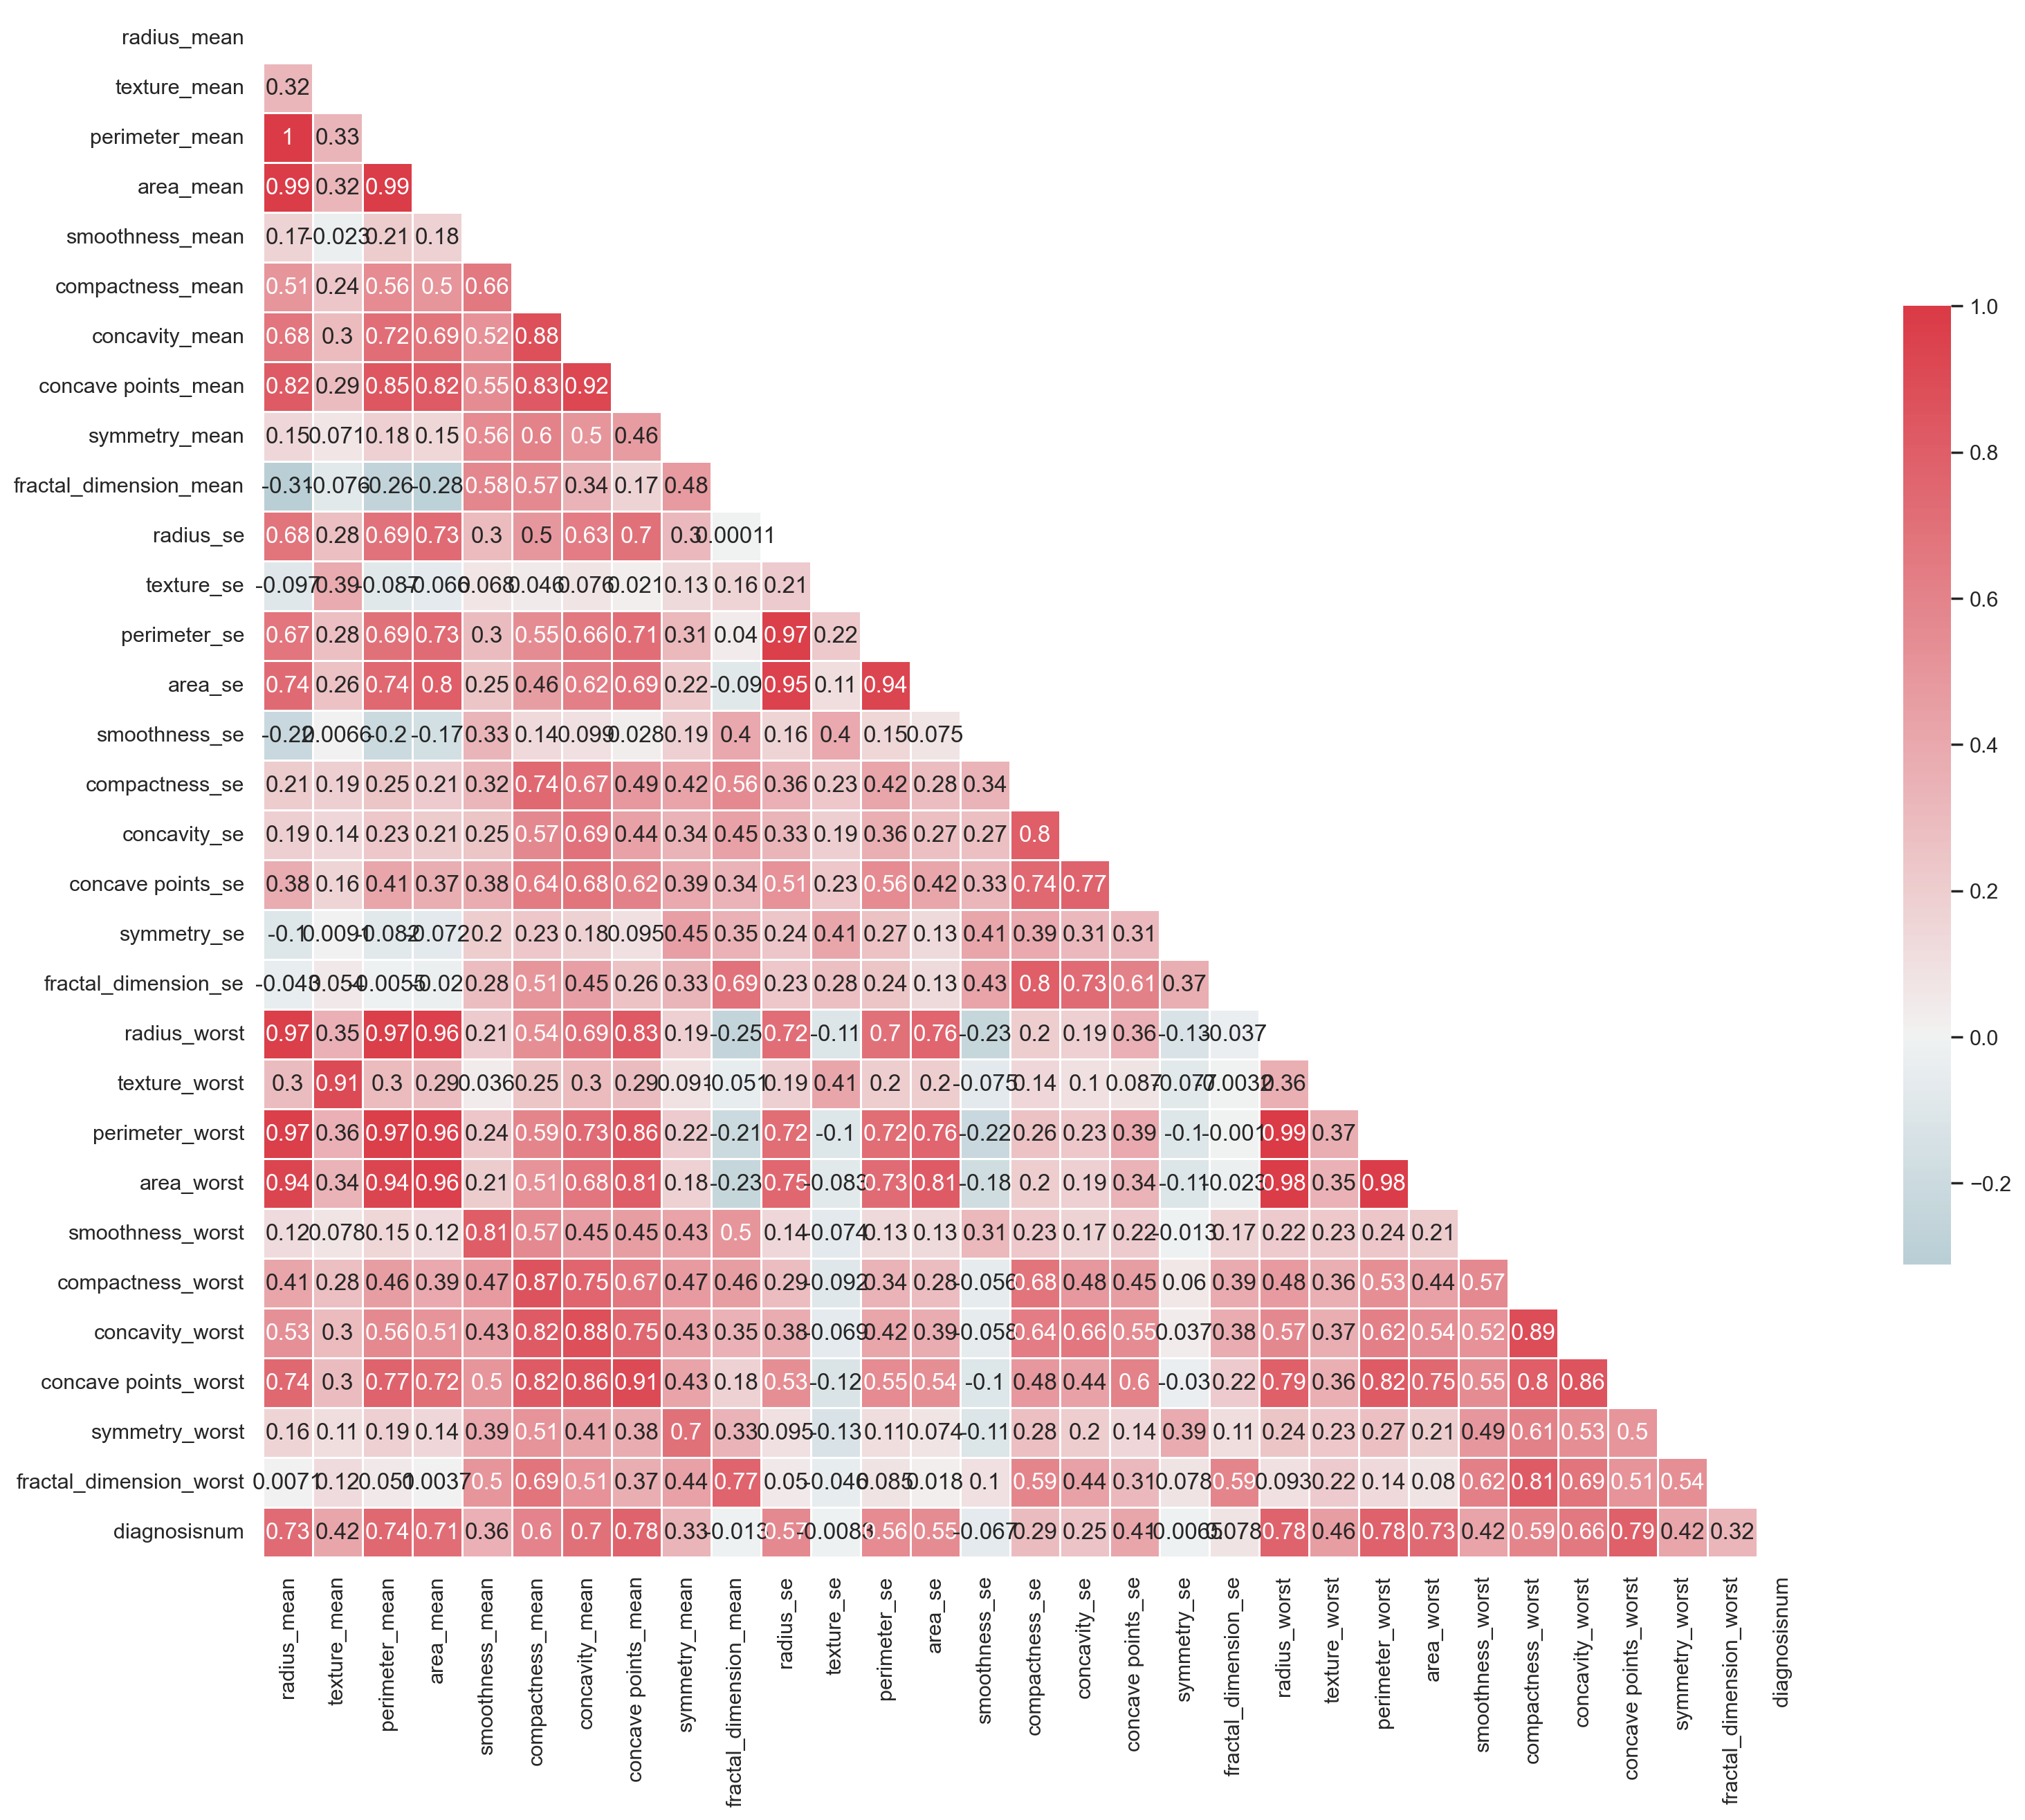

In [150]:
# Examples: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set(style="white")
corr = b_cancer.corr(numeric_only=True)

#mask
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

#matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)  #colormap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


plt.show()



In [152]:
#to replace 0, 1 instead of B or M in diagnosis column but i have already created diagnosisnum column
#diagnosis_map = {
    #'B': 0
    #, 'M': 1
#}

#breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map(diagnosis_map)

b_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosisnum
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### 3. Logistic Regression Model
In this section we fit and then evaluate a logistic regression model using a number of performance metrics.

#### 3.1 Perform a train-test split and fit a logistic regression model to the training set.

In [183]:
target_col = 'diagnosisnum'
exclude    = [target_col, 'diagnosis']
feature_cols = [c for c in b_cancer.columns if c not in exclude]

X = b_cancer[feature_cols]
y = b_cancer[target_col]


In [185]:
# Perform train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lin_model = LogisticRegression()
# Fit a logistic regression model to the training set:
lin_model.fit(X_train, y_train)

/Users/Anaconda3/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [187]:
# predict test class:
y_pred = lin_model.predict(X_test)
# predicted test probability:
y_pp = lin_model.predict_proba(X_test)

In [189]:
y_test

id
906564      0
85715       1
891670      0
874217      1
905680      1
           ..
88203002    0
905557      0
91594602    1
884180      1
905686      0
Name: diagnosisnum, Length: 143, dtype: int64

#### 3.3 Create the confusion matrix for your classifier's performance on the test set.

Convert confusion_matrix to a dataframe.

    columns=['predicted_healthy', 'predicted_cancer']
    index=['is_healthy', 'is_cancer']

In [192]:
# ANSWER
c_matrix = confusion_matrix(y_test, y_pred)

In [194]:
c_matrix

array([[84,  4],
       [ 4, 51]])

In [197]:
conf = pd.DataFrame(c_matrix, columns=['predicted_healthy','predicted_cancer'],
                         index=['is_healthy', 'is_cancer'])
conf

,predicted_healthy,predicted_cancer
is_healthy,84,4
is_cancer,4,51


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?

    (TP + TN) / float(TP + TN + FP + FN)

In [199]:
# ANSWER
# use float to perform true division, not integer division

print(accuracy_score(y_test, y_pred))

0.9440559440559441


#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [201]:
# ANSWER

print(1 - accuracy_score(y_test, y_pred))

0.05594405594405594


#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN

    sensitivity = TP / float(FN + TP)

In [211]:
# ANSWER
sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
print(sensitivity)

0.9272727272727272


#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP

    specificity = TN / (TN + FP)

In [219]:
# ANSWER
TP = confusion_matrix(y_test, y_pred)[1, 1]
TN = confusion_matrix(y_test, y_pred)[0, 0]
FP = confusion_matrix(y_test, y_pred)[0, 1]
FN = confusion_matrix(y_test, y_pred)[1, 0]

specificity = TN / (TN + FP)
specificity

0.9545454545454546

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [221]:
# ANSWER
print(1 - specificity)

0.045454545454545414


#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [227]:
# ANSWER
print(metrics.precision_score(y_test, y_pred, pos_label=1))

0.9272727272727272


#### 3.10 Create a predicted test probability dataframe with column names 'class_0_pp','class_1_pp'

In [230]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)
Y_pp = pd.DataFrame(lin_model.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])
Y_pp.head(10)

,class_0_pp,class_1_pp
0,0.562064,0.437936
1,0.408388,0.591612
2,0.997686,0.002314
3,0.000331,0.999669
4,0.144629,0.855371
5,0.000688,0.999312
6,0.000002,0.999998
7,0.002806,0.997194
8,0.981502,0.018498
9,0.985894,0.014106


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

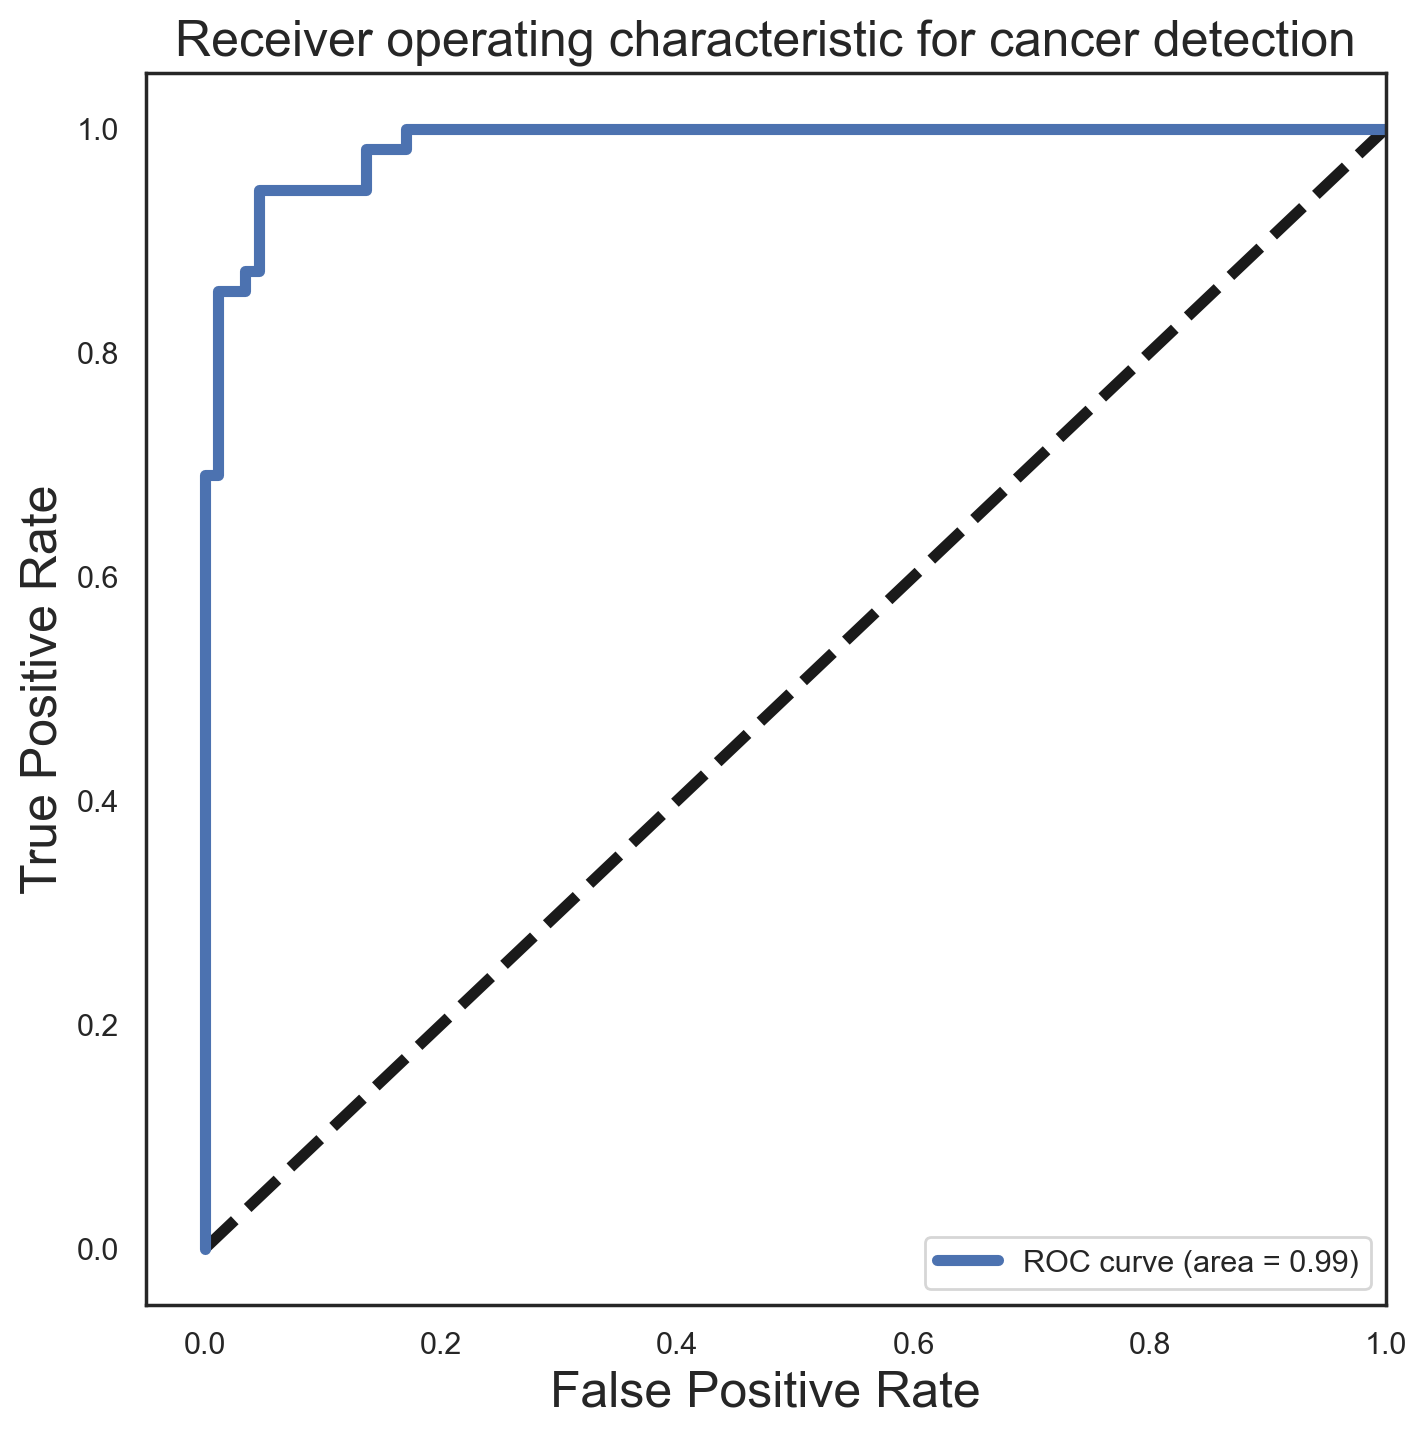

In [263]:
# For class 1, find the area under the curve
# Find fpr, tpr
fpr, tpr, _ = roc_curve(y_test, Y_pp['class_1_pp'], pos_label=1)

# Find auc
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



